**Naive Bayse Theorem**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [ ]:

# Generate synthetic data
np.random.seed(42) # for reproducibility

num_samples = 200

# Generate score and add some noise
score = np.random.uniform(40, 100, num_samples)
score_noise = np.random.normal(0, 5, num_samples)
score = np.clip(score + score_noise, 0, 100) # ensure score is within [0, 100]

# Determine CGPA based on score (higher score means higher CGPA)
cgpa = 6 + (score / 100) * 4 # Scale score to be in the range [6, 10]
cgpa_noise = np.random.normal(0, 0.5, num_samples)
cgpa = np.clip(cgpa + cgpa_noise, 0, 10) # Ensure CGPA is within [0, 10]

# Determine placement based on both CGPA and score being "high"
# Define thresholds for "high"
score_threshold = 75
cgpa_threshold = 8.0

placed = ((score > score_threshold) & (cgpa > cgpa_threshold)).astype(int)

# Create a pandas DataFrame
data = pd.DataFrame({
    'CGPA': cgpa,
    'Score': score,
    'Placed': placed
})

# Display the first few rows of the dataset
data.head()


,CGPA,Score,Placed
0,8.791721,59.072284,0
1,9.848196,98.204127,1
2,9.405892,85.384999,1
3,8.392645,72.347752,0
4,8.338343,58.689991,0


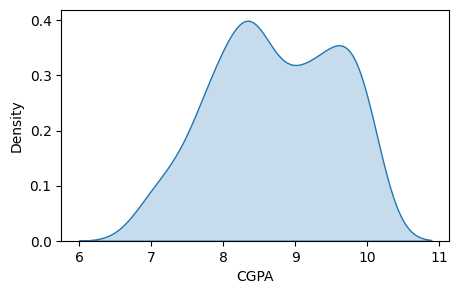

In [ ]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=data, x='CGPA', fill=True)
plt.show()

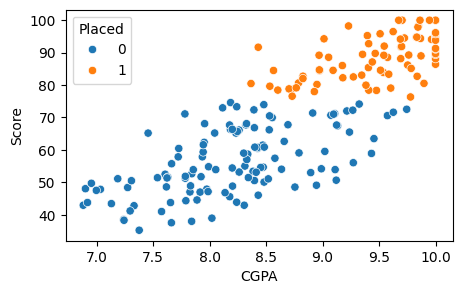

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='CGPA', y='Score', hue='Placed', data=data)
plt.show()

In [ ]:
x = data.drop('Placed', axis=1)
y = data['Placed']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
model.score(x_test, y_test)*100 , model.score(x_train, y_train)*100

(97.5, 97.5)

In [ ]:
model.predict([[9.405892,85.384999]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Axes: >

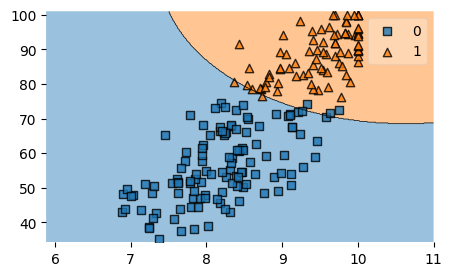

In [ ]:
plt.figure(figsize=(5, 3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=model)

In [ ]:
mlt = MultinomialNB()
mlt.fit(x_train, y_train)

MultinomialNB()

In [ ]:
mlt.score(x_test, y_test)*100 , mlt.score(x_train, y_train)*100

(77.5, 83.125)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


<Axes: >

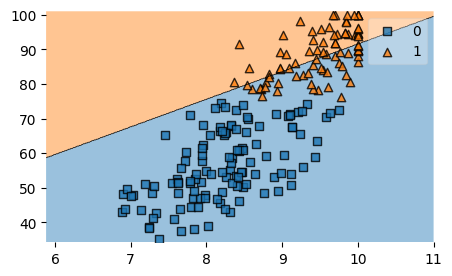

In [ ]:
plt.figure(figsize=(5, 3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=mlt)

In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
bnb.score(x_test, y_test)*100 , bnb.score(x_train, y_train)*100

(60.0, 60.0)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


<Axes: >

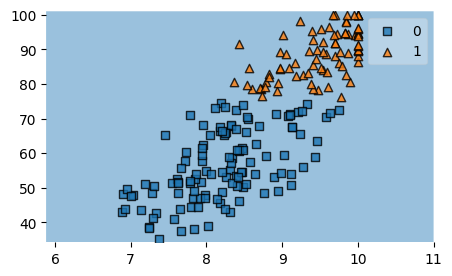

In [ ]:
plt.figure(figsize=(5, 3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=bnb)